In [1]:
%matplotlib inline

from __future__ import division
import igraph as ig
from datetime import datetime, timedelta
import itertools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.colors
import os
import csv
import random
import glob
import re
import time
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter, HourLocator, DayLocator
import matplotlib.ticker as ticker
import random
import json
import cPickle as pickle
import cairo
from collections import defaultdict
import pyqt_fit.nonparam_regression as smooth
from pyqt_fit import npr_methods
import pyqt_fit.bootstrap as bs
from _pybgpstream import BGPStream, BGPRecord, BGPElem
from IPython.display import display
import sys
import fnmatch
import urllib, urllib2
from lxml import etree
from multiprocessing import Pool, cpu_count
import csv
import json
from urllib import urlencode, urlopen
from os import mkdir
from shutil import rmtree
import ijson
import bigjson
import sqlite3
import scipy.stats as stats
import calendar

# Null case analysis

## Using the external function

In [3]:
import helper_functions

In [5]:
os.chdir("/your_directory_path/data/")

database_name = 'Indonesia_null_interarrival_times_database.db'
conn = helper_functions.create_connection(database_name)

burstiness_annoucement_dic = defaultdict(lambda: defaultdict(list))

cur = conn.cursor()

# Get the name of the collectors
cur.execute('SELECT name FROM sqlite_master WHERE type="table"')
collectors = cur.fetchall()
collectors = [collector[0] for collector in collectors]

for collector in collectors:

    # Get a list of ases sampled
    cur.execute('SELECT DISTINCT(asn) FROM ' + collector)
    ases = cur.fetchall()
    ases = [asn[0] for asn in ases]
    print collector, ases

    for asn in ases:

        # Get a list of inter_arrival_times per collector and asn
        cur.execute('SELECT timestamps FROM ' + collector + ' WHERE asn=?', (asn,))
        inter_arrival_samples = cur.fetchall()
        samples = len(inter_arrival_samples)
        print asn, samples
        
        for sample in range(samples):
            
            # print sample
            
            inter_arrival_times_raw = json.loads(inter_arrival_samples[sample][0])
            inter_arrival_times_unique = list(set(inter_arrival_times_raw))

            # Consider only ases with more than 100 events
            if len(inter_arrival_times_unique) >= 5:

                # Remove duplicates and sorted in increasing order
                burstiness = helper_functions.compute_burstiness_modified(sorted(inter_arrival_times_unique))

                # Measure the number of unique updates
                volume = len(inter_arrival_times_unique)

                # Compute the number of every possible as
                burstiness_annoucement_dic[collector][asn].append([burstiness, volume])



_isc [u'18173', u'198568', u'24051', u'42116', u'4761', u'55816']
18173 101
198568 101
24051 101
42116 101
4761 101
55816 101
_linx [u'133085', u'3838', u'4761', u'5438', u'61291', u'61901']
133085 101
3838 101
4761 101
5438 101
61291 101
61901 101
_eqix [u'10241', u'12171', u'23165', u'27160', u'40270', u'4761']
10241 101
12171 101
23165 101
27160 101
40270 101
4761 101
_perth [u'133133', u'45570', u'4739', u'4761', u'7545', u'9627']
133133 101
45570 101
4739 101
4761 101
7545 101
9627 101
_kixp [u'33770', u'36866', u'37113', u'37146', u'37354', u'4761']
33770 101
36866 101
37113 101
37146 101
37354 101
4761 101
_jinx [u'263174', u'28885', u'4761', u'48861', u'48944', u'5484']
263174 101
28885 101
4761 101
48861 101
48944 101
5484 101
_nwax [u'13576', u'37475', u'47195', u'4761', u'58925', u'8865']
13576 101
37475 101
47195 101
4761 101
58925 101
8865 101
_soxrs [u'13427', u'34139', u'36236', u'43615', u'4761', u'57595']
13427 101
34139 101
36236 101
43615 101
4761 101
57595 101
_saop

## Burstiness

In [6]:
asn_attacker = '4761'

# Load the dictionary of knowledge
with open("dic_feeders_evolution_Indonesia.p", "rb") as fp:
    evolution_dic = pickle.load(fp)
    
    
with open('dic_of_tops_burstiness_indonesia.json', 'r') as fp:
    dic_of_tops_burstiness = json.load(fp)
    
# Add in the last place the ASN of the attacker
for collector in dic_of_tops_burstiness:
    dic_of_tops_burstiness[collector].append(asn_attacker)
    
print dic_of_tops_burstiness

reference_time = "2014-03-31 00:00:00"
new_dic = {}

for collector in evolution_dic:
    new_dic[collector] = len(set(np.array(evolution_dic[collector][reference_time])[:,1])) # ASes are index 1
    
number_of_feeders = sorted(new_dic, key=lambda k: new_dic[k], reverse=True) # Sort collectors in increasing order
number_of_feeders = ['route-views' + feed if (feed == '2' or feed == '3' or feed == '4' or feed == '6') else 'route-views.' + feed for feed in number_of_feeders]
print number_of_feeders

/home/pmoriano/Research/Hijacks/Graph-Analysis/BGPParser/New-Analysis/random_new/data
{u'route-views.saopaulo': [u'61291', u'50139', u'23041', u'23527', u'199715', '4761'], u'route-views.perth': [u'45570', u'4739', u'133133', u'9627', u'7545', '4761'], u'route-views.isc': [u'198568', u'24051', u'42116', u'55816', u'18173', '4761'], u'route-views.wide': [u'1267', u'26554', u'8323', u'35393', u'7642', '4761'], u'route-views.soxrs': [u'36236', u'34139', u'13427', u'43615', u'57595', '4761'], u'route-views.kixp': [u'37354', u'33770', u'37146', u'36866', u'37113', '4761'], u'route-views.jinx': [u'48944', u'28885', u'5484', u'48861', u'263174', '4761'], u'route-views.nwax': [u'37475', u'47195', u'58925', u'13576', u'8865', '4761'], u'route-views.telxatl': [u'197982', u'51164', u'44634', u'196802', u'8323', '4761'], u'route-views.eqix': [u'40270', u'27160', u'10241', u'23165', u'12171', '4761'], u'route-views2': [u'23316', u'199572', u'198540', u'14602', u'198408', '4761'], u'route-views3': [

## Get the four more significant

route-views.linx
route-views.saopaulo
route-views4
route-views2


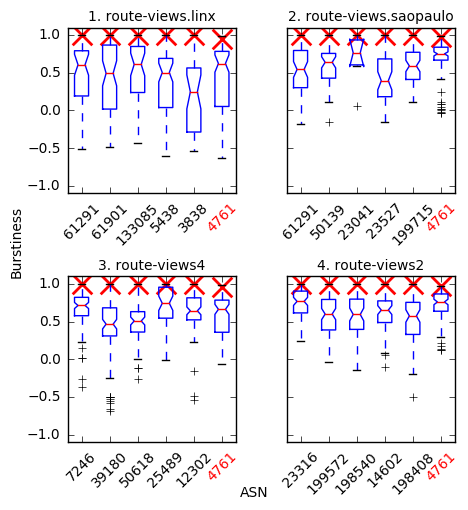

In [8]:
asn_attacker = '4761'
list_collectors = number_of_feeders[:4]

# Number of columns in the plot
col = 2
if len(list_collectors) % col != 0: # Odd
    row = int(len(list_collectors)/col) + 1
else: # Even
    row = int(len(list_collectors)/col)


fig, axes = plt.subplots(row, col, sharex=False, sharey=True) 
fig.subplots_adjust(hspace=0.5, wspace=0.3)

count = 0

for collector_name in list_collectors:
    
    print collector_name
    index_x = int(count/col)
    
    if count % col == 0:
        index_y = 0
    elif count % col == 1:
        index_y = 1
    else:
        index_y = 2
            
    ax = axes[index_x, index_y] 
    
    # Extract collector name
    collector = re.search(r'route-views(.*)', collector_name).group(1)

    if collector[0] == ".":
        collector = collector[1:]

    # # Add '_' to be a valid table name
    collector = "_" + collector
    
    ax.set_title(str(count + 1) + '. ' + collector_name, fontsize=10) 
    
    data = []
    
    # Get the name of the ASes of interest
    top_list = dic_of_tops_burstiness[collector_name]
    
    # print "top_list", top_list
    
    for asn in top_list:
 
        if asn in burstiness_annoucement_dic[collector]:
            burstiness_array = np.array(burstiness_annoucement_dic[collector][asn])[:,0]
            burstiness_array = burstiness_array[np.isfinite(burstiness_array)]
            data.append(burstiness_array)
        else:
            data.append([])
            
    ax.boxplot(data, notch=True, labels=top_list)    
    ax.get_xticklabels()[5].set_color("red")
    ax.set_ylim([-1.1, 1.1])

    collector_number = 1
    for asn in top_list:
        # if asn == asn_attacker:
        if asn in burstiness_annoucement_dic[collector]:
            # The observations during attack is the last introduced entry
            ax.scatter(collector_number, burstiness_annoucement_dic[collector][asn][-1][0], marker="x", c="red", s=200, lw=2)

        collector_number += 1
        
    # Assign font size
    for label in ([ax.xaxis.label, ax.yaxis.label]):
        label.set_fontsize(10)

    # x axis
    for tl in ax.get_xticklabels():
        tl.set_fontsize(10)
        tl.set_rotation(45)

    # y axis
    for tl in ax.get_yticklabels():
        tl.set_fontsize(10)

    # Change ticks space
    ax.tick_params(axis="both", which="major", pad=5)
            
    count += 1
            
fig.text(0.47, 0.03, 'ASN', va="center", rotation="horizontal", fontsize=10)
fig.text(0.01, 0.5, 'Burstiness', va="center", rotation="vertical", fontsize=10)

size = 5
fig.set_size_inches(w=size, h=1.07*size) # size/1.618
    
    
plt.show()

## Remaining collectors

route-views.eqix
route-views6
route-views.isc
route-views3
route-views.sydney
route-views.jinx
route-views.telxatl
route-views.nwax
route-views.wide
route-views.perth
route-views.kixp
route-views.soxrs


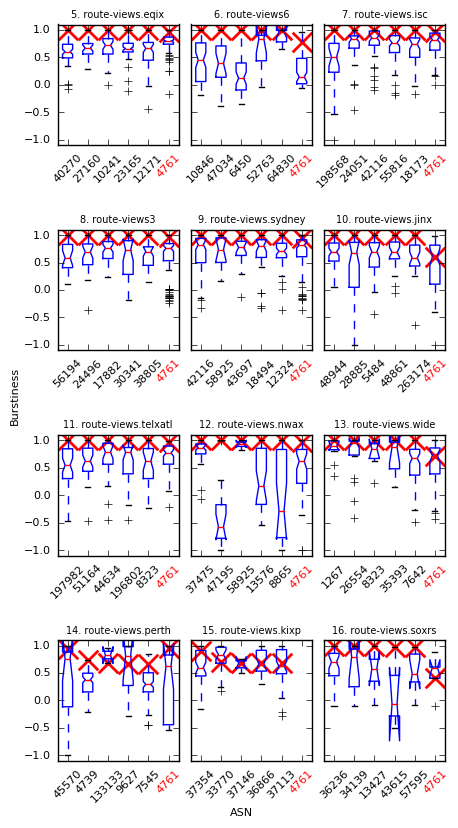

In [9]:
asn_attacker = '4761'

list_collectors = number_of_feeders[4:]

# Number of columns in the plot
col = 3
if len(list_collectors) % col != 0: # Odd
    row = int(len(list_collectors)/col) + 1
else: # Even
    row = int(len(list_collectors)/col)


fig, axes = plt.subplots(row, col, sharex=False, sharey=True) 
fig.subplots_adjust(hspace=0.7, wspace=0.1)

count = 0

for collector_name in list_collectors:
    
    print collector_name
    index_x = int(count/col)
    
    if count % col == 0:
        index_y = 0
    elif count % col == 1:
        index_y = 1
    else:
        index_y = 2
            
    ax = axes[index_x, index_y] 
    
    # Extract collector name
    collector = re.search(r'route-views(.*)', collector_name).group(1)

    if collector[0] == ".":
        collector = collector[1:]

    # # Add '_' to be a valid table name
    collector = "_" + collector
    
    ax.set_title(str(count + 5) + '. ' + collector_name, fontsize=7) 
    
    data = []
    
    # Get the name of the ASes of interest
    top_list = dic_of_tops_burstiness[collector_name]
    
    # print "top_list", top_list
    
    for asn in top_list:
 
        if asn in burstiness_annoucement_dic[collector]:
            burstiness_array = np.array(burstiness_annoucement_dic[collector][asn])[:,0]
            burstiness_array = burstiness_array[np.isfinite(burstiness_array)]
            data.append(burstiness_array)
        else:
            data.append([])
            
    ax.boxplot(data, notch=True, labels=top_list)  
    ax.get_xticklabels()[5].set_color("red")
    ax.set_ylim([-1.1, 1.1])

    collector_number = 1
    for asn in top_list:
        # if asn == asn_attacker:
        if asn in burstiness_annoucement_dic[collector]:
            # The observations during attack is the last introduced entry
            ax.scatter(collector_number, burstiness_annoucement_dic[collector][asn][-1][0], marker="x", c="red", s=200, lw=2)

        collector_number += 1
        
    # Assign font size
    for label in ([ax.xaxis.label, ax.yaxis.label]):
        label.set_fontsize(8)

    # x axis
    for tl in ax.get_xticklabels():
        tl.set_fontsize(8)
        tl.set_rotation(45)

    # y axis
    for tl in ax.get_yticklabels():
        tl.set_fontsize(8)

    # Change ticks space
    ax.tick_params(axis="both", which="major", pad=5)
            
    count += 1
            
fig.text(0.47, 0.07, 'ASN', va="center", rotation="horizontal", fontsize=8)
fig.text(0.03, 0.51, 'Burstiness', va="center", rotation="vertical", fontsize=8)

size = 5
fig.set_size_inches(w=size, h=1.9*size) # size/1.618
        
plt.show()

In [123]:
# Close the cursor
cur.close()

# Close the local connection
conn.close()